# Desafio 1

Conforme definido em sala, os alunos deverão realizar o seguinte desafio pontuado:

- Escolher uma base de dados na área de saúde, educação, segurança pública ou gestão. OBS: o tema dos alunos que faltaram é GESTÃO;
- Criar e enviar o modelo conceitual de Banco de dados;
- Criar o modelo lógico e físico de Banco de Dados;
- Criar o Schema e persistir no Banco de Dados;
- Escolher o dataset, o mesmo deve ser tratado e poderá ter em torno de 1000 linhas (você pode abrir no excel fazer a exclusão de linhas e colunas para ele ficar menor);
- Persistir os dados no banco de dados;
- Fazer todo o processo de CRUD utilizando python;
- Gerar 3 gráficos relacionados ao dataset.
Você deve enviar o dataset tratado, o modelo conceitual, o schema do banco, o arquivo python.

Base de dados: Internações hospitalares no Brasil do mês de dezembro/2024. O dataset, originalmente com mais de um milhão de entradas e cem colunas, foi reduzido a 50000 entradas e 11 colunas.

https://www.kaggle.com/datasets/andersonfranca/sistema-de-informaes-hospitalares-sus/data

Auxiliarmente, foi utilizado também um dataset simples, contendo o código e a descrição das subcategorias do CID10.

http://www2.datasus.gov.br/cid10/V2008/descrcsv.htm#:~:text=CID-10-SUBCATEGORIAS.,CID-O-GRUPOS.

In [1]:
import pandas as pd

df = pd.read_csv('data/inter_hosp_br_202412.csv', sep=';')

df.shape

(50000, 12)

In [2]:
df.columns

Index(['NASC', 'SEXO', 'QT_DIARIAS', 'DIAG_PRINC', 'IDADE', 'DIAS_PERM',
       'MORTE', 'INSTRU', 'RACA_COR', 'CAR_INT', 'COBRANCA', 'ID'],
      dtype='object')

In [3]:
df.dtypes

NASC           int64
SEXO           int64
QT_DIARIAS     int64
DIAG_PRINC    object
IDADE          int64
DIAS_PERM      int64
MORTE          int64
INSTRU         int64
RACA_COR       int64
CAR_INT        int64
COBRANCA       int64
ID             int64
dtype: object

In [4]:
df_cid = pd.read_csv('data/CID-10-SUBCATEGORIAS2.csv', encoding='ISO-8859-1')
df_cid.head()

,SUBCAT,DESCRICAO
0,A000,Cólera devida a Vibrio cholerae 01
1,A001,Cólera devida a Vibrio cholerae 01
2,A009,Cólera não especificada
3,A010,Febre tifóide
4,A011,Febre paratifóide A


In [5]:
from sqlalchemy import create_engine, inspect, text

In [6]:
# Dados do banco

user = "ufrkpl872bmu15"
password = "pfc2f800f1a232ad1055c52d4cbc53018d57166e9190b5215ce20c656fd97ed3b"
host = "cbec45869p4jbu.cluster-czrs8kj4isg7.us-east-1.rds.amazonaws.com"
port = "5432"
database = "d487kabe2ju107"

# String de conexão
DATABASE_URL = f"postgresql://{user}:{password}@{host}:{port}/{database}"

# Criação do engine
engine = create_engine(DATABASE_URL)

# Testar conexão (opcional)
with engine.connect() as connection:
    result = connection.execute(text("SELECT 1"))  # <-- corrigido aqui
    print(result.scalar())

1


Inclusão dos dados da tabela CID_Subcategorias no banco com sqlalchemy

In [7]:
df_cid.to_sql(
    name='cid_subcategorias',
    con=engine,
    if_exists='append',   # Comportamento se a tabela já existir: 'fail', 'replace', 'append'
    index=False
)

451

In [8]:
pd.read_sql_table('cid_subcategorias', engine)

,SUBCAT,DESCRICAO
0,A000,Cólera devida a Vibrio cholerae 01
1,A001,Cólera devida a Vibrio cholerae 01
2,A009,Cólera não especificada
3,A010,Febre tifóide
4,A011,Febre paratifóide A
...,...,...
12446,U818,Agente resistente a outros antibióticos relaci...
12447,U88,Agente resistente a múltiplos antibióticos
12448,U898,Agente resistente a outro antibiótico especifi...
12449,U899,Agente resistente a antibiótico não especificado


In [9]:
df.to_sql(
    name='internacoes',
    con=engine,
    if_exists='append',   # Comportamento se a tabela já existir: 'fail', 'replace', 'append'
    index=False
)

1000

In [10]:
pd.read_sql_table('internacoes', engine)

,NASC,SEXO,QT_DIARIAS,DIAG_PRINC,IDADE,DIAS_PERM,MORTE,INSTRU,RACA_COR,CAR_INT,COBRANCA,ID
0,19750601,3,1,K439,49,1,0,0,3,1,12,1
1,19880908,3,1,K808,36,1,0,0,3,1,12,2
2,19690405,3,1,K808,55,1,0,0,3,1,12,3
3,19791004,3,1,K429,45,1,0,0,3,1,12,4
4,19660130,1,1,K409,58,1,0,0,3,1,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,19911027,1,17,S221,32,17,0,0,3,2,12,49996
49996,19570731,1,11,S720,67,12,0,0,3,2,12,49997
49997,19670122,1,12,S728,57,12,0,0,3,2,12,49998
49998,19850901,1,6,S826,39,6,0,0,3,2,12,49999


In [14]:
df['DIAG_PRINC'].value_counts().head(10)

DIAG_PRINC
O800    4653
Z302     938
J189     873
O820     778
I64      692
K409     618
N390     548
D259     514
A499     483
A09      477
Name: count, dtype: int64

### Gráficos

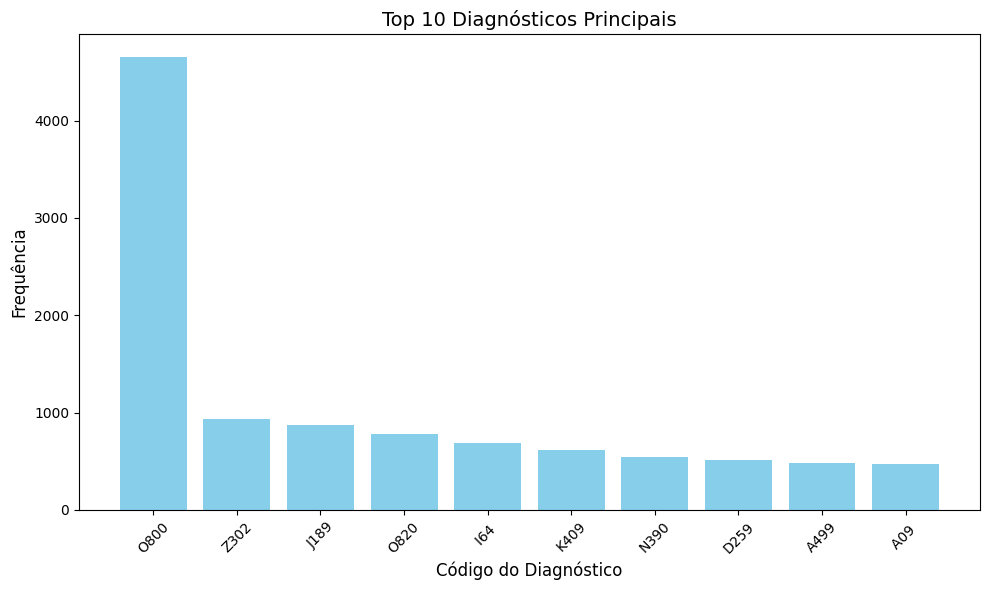

In [16]:
import matplotlib.pyplot as plt

# Obter os 10 diagnósticos principais mais frequentes
dez_maiores = df['DIAG_PRINC'].value_counts().head(10)

# Criar histograma (gráfico de barras)
plt.figure(figsize=(10, 6))
plt.bar(dez_maiores.index, dez_maiores.values, color='skyblue')

# Títulos e rótulos
plt.title('Top 10 Diagnósticos Principais', fontsize=14)
plt.xlabel('Código do Diagnóstico', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor leitura

# Mostrar o gráfico
plt.tight_layout()
plt.show()

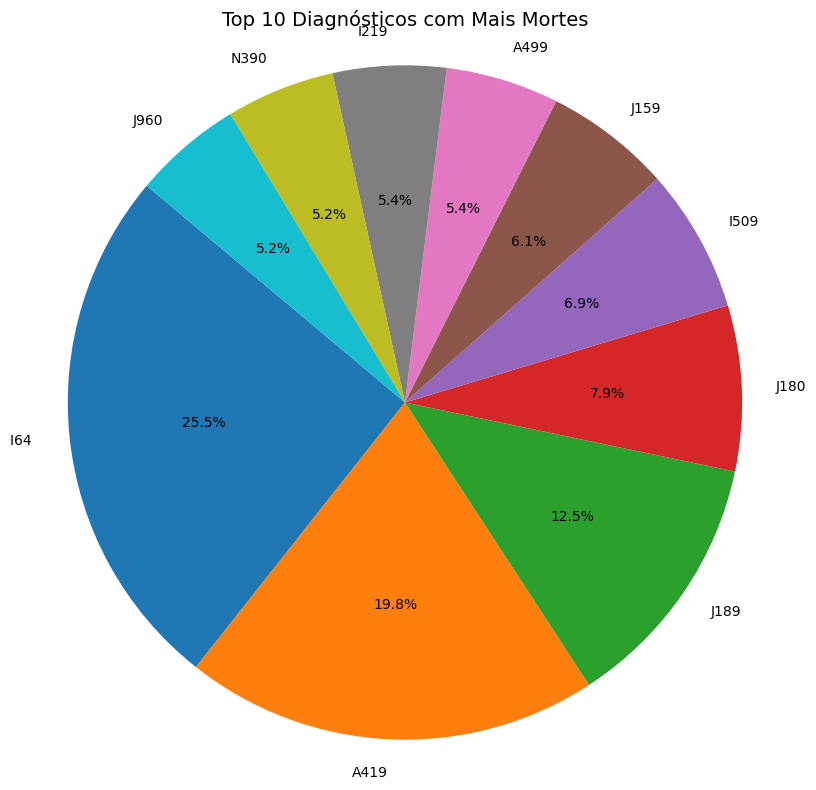

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filtrar apenas registros com morte
df_mortes = df[df['MORTE'] == 1]

# 2. Contar mortes por diagnóstico
mortes_por_diag = df_mortes['DIAG_PRINC'].value_counts().head(10)

# 3. Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    mortes_por_diag.values,
    labels=mortes_por_diag.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)

plt.title('Top 10 Diagnósticos com Mais Mortes', fontsize=14)
plt.axis('equal')  # mantém a proporção circular
plt.tight_layout()
plt.show()


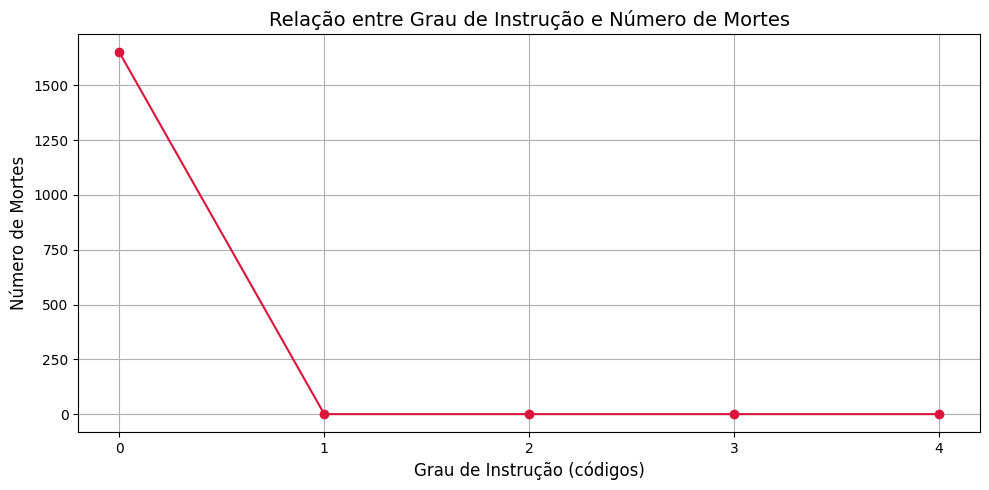

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por INSTRU e somar as mortes
mortes_por_instrucao = df.groupby('INSTRU')['MORTE'].sum().sort_index()

# Gráfico de linhas
plt.figure(figsize=(10, 5))
plt.plot(mortes_por_instrucao.index, mortes_por_instrucao.values, marker='o', color='crimson')

# Rótulos e título
plt.title('Relação entre Grau de Instrução e Número de Mortes', fontsize=14)
plt.xlabel('Grau de Instrução (códigos)', fontsize=12)
plt.ylabel('Número de Mortes', fontsize=12)
plt.grid(True)
plt.xticks(mortes_por_instrucao.index)  # mostra todos os níveis

plt.tight_layout()
plt.show()
